# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

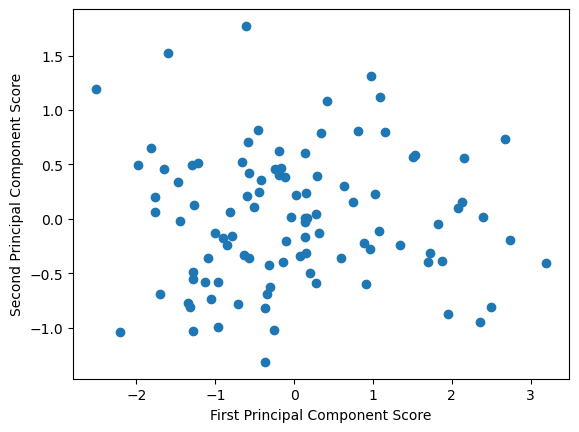

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

***
<div style="border-radius: 10px; border: purple solid; border-bottom: none; padding: 10px; background-color: #; font-size: 100%;">
    
### Outliers in the Upper Left Corner:

The 3 outliers in the upper left corner have have __low PC1 scores__ because they are positioned far to the left on the x-axis. Since PC1 is dominated by `series_3` (weight ~ 0.92), this suggests these points have unusually low values in `series_3` compared to the rest of the data. 

These outliers have high __PC2 scores__ because they are at the top of the y-axis. PC2 is primarily influenced by `series_1` (~ 0.60) and `series_2` (~ 0.69), with a negative contribution from series_3 (~ -0.40). This suggests that their high PC2 scores likely result from high values in `series_1` and `series_2`. The negative weight of series_3 in PC2 further confirms their low `series_3` values (consistent with their low PC1 scores).
s.

### Interpretation of r Series_1, Series_2, and Series_3:

From the PCA components matrix: 
* The first principal component (PC1) has high weight for `series_3` (~ 0.9), meaning that `series_3` contributes the most to the first principal component.
* The second principal component (PC2) has large weights for `series_1` (~ 0.6) and `series_2` (~ 0.7), but a negative weight for `series_3` (~ -0.4).

### What Can We Say About Series_3?

Since the 3 outliers have low PC1 scores, and PC1 is largely determined by `series_3`, it suggests that these outliers have low values in `series_3`.

### Why Is It Hard to Say Something About Series_1 and Series_2?

It is difficult to determine the values of `series_1` and `series_2` because they were created to be highly correlated, meaning they tend to move together. Most of their variation is captured by PC1, which is mainly influenced by `series_3`. PC2 only shows small differences between `series_1` and `series_2`, not their real values. Since PC2 only explains about ~19% of the total variance, it does not provide much meaningful insight into `series_1` and `series_2`.

### How are series_1 and series_2 related, according to how they were created?

`Series_2` is just `series_1` with a small amount of noise: `series2 = series1 × (1+small noise)`

This means they are almost the same pattern with slight variations.


### Drawing a Pairplot:

* Strong correlation between `series_1 and series_2`: their scatter plot look like a diagonal line.
* Moderate correlation between `series_1 and series_3`, but with more spread due to `series_3` has more noise.
* Similar pattern for `series_2 and series_3` as `series_1 and series_3` .

This confirmed that `series_1 and series_2` are almost the same, and `series_3` adds more variation.

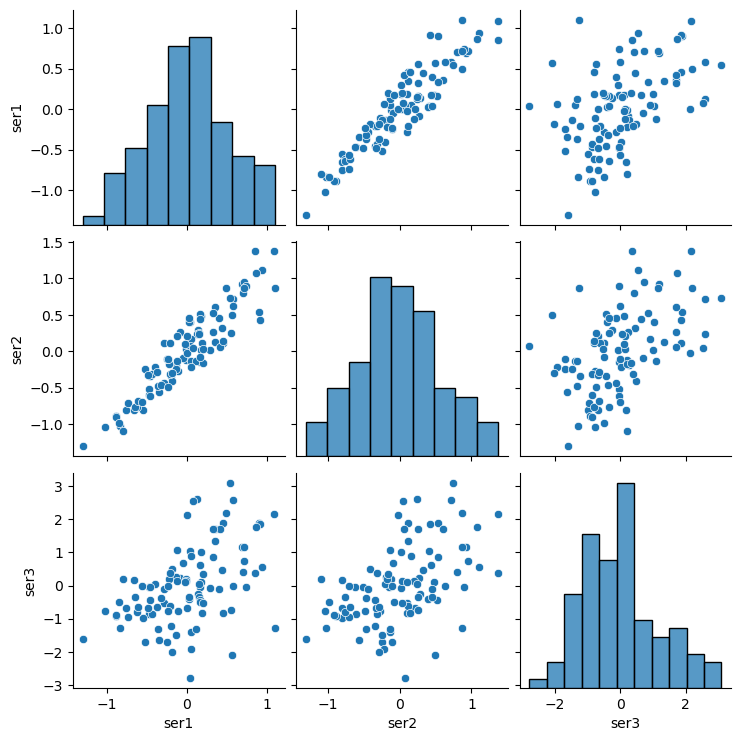

In [2]:
import seaborn as sns
# Plot a pairplot
sns.pairplot(df)
plt.show()

<div style="border-radius: 10px; border: purple solid; border-top: none; padding: 10px; background-color: #; font-size: 100%;">


### Advantages and Disadvantages of the PCA Scatter Plot:

__Advantages:__

* Easier visualization: reduces 3 dimensions into 2, making it easier to visualize patterns.
* Finds main variance: help to identify outliers and see which feature has the most effect on data.
* Confirms that most variance (~ 80%) is in the first principal component, suggesting a dominant trend in the data.

__Disadvantages:__
* Hard to understand the original variable relationships (series_1 vs. series_2).
* PC2 only explains ~ 19% of variance, meaning it may not be very meaningful.
* We lose direct information about original feature values, so we cannot make direct comparisons.



### Does the Graph Show Anything Interesting?

Yes! It suggests `series_3` contributes the most to total variance. `series_1 and series_2` are highly correlated. And, the 3 outliers in the upper left likely have low `series_3` values, making them stand out.



# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

<h1 style="text-align:center; font-size:35px; color:black;"> USA Real Estate Dataset </h1>

<center>    
<strong>Data Source:</strong>  https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset/data
</center>

***

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# Load the dataset

housing = pd.read_csv('realtor-data.csv')

In [5]:
housing.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [7]:
# checking missing values
housing.isnull().sum().sort_values(ascending=False)

prev_sold_date    734297
house_size        568484
bath              511771
bed               481317
acre_lot          325589
street             10866
brokered_by         4533
price               1541
city                1407
zip_code             299
state                  8
status                 0
dtype: int64

* #### To fill missing values

In [8]:
housing['house_size'] = housing['house_size'].fillna(housing['house_size'].median())
housing['acre_lot'] = housing['acre_lot'].fillna(housing['acre_lot'].median())
housing['bed'] = housing['bed'].fillna(housing['bed'].mode()[0])
housing['bath'] = housing['bath'].fillna(housing['bath'].mode()[0])

median_price_by_city = housing.groupby('city')['price'].median()
housing['price'] = housing['price'].fillna(housing['city'].map(median_price_by_city))
housing = housing.dropna(subset=['price'])
housing = housing.dropna(subset=['zip_code'])

In [9]:
housing.isnull().sum().sort_values(ascending=False)

prev_sold_date    734007
street             10799
brokered_by         4533
city                1298
state                  6
status                 0
price                  0
bed                    0
bath                   0
acre_lot               0
zip_code               0
house_size             0
dtype: int64

In [10]:
housing.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,1760.0,NaN


## Heatmap
For understanding relationships between variables



In [11]:
numeric_columns = housing.select_dtypes(include=[np.number])
numeric_columns

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
0,103378.0,105000.0,3.0,2.0,0.12,1962661.0,601.0,920.0
1,52707.0,80000.0,4.0,2.0,0.08,1902874.0,601.0,1527.0
2,103379.0,67000.0,2.0,1.0,0.15,1404990.0,795.0,748.0
3,31239.0,145000.0,4.0,2.0,0.10,1947675.0,731.0,1800.0
4,34632.0,65000.0,6.0,2.0,0.05,331151.0,680.0,1760.0
...,...,...,...,...,...,...,...,...
2226377,23009.0,359900.0,4.0,2.0,0.33,353094.0,99354.0,3600.0
2226378,18208.0,350000.0,3.0,2.0,0.10,1062149.0,99354.0,1616.0
2226379,76856.0,440000.0,6.0,3.0,0.50,405677.0,99354.0,3200.0
2226380,53618.0,179900.0,2.0,1.0,0.09,761379.0,99354.0,933.0


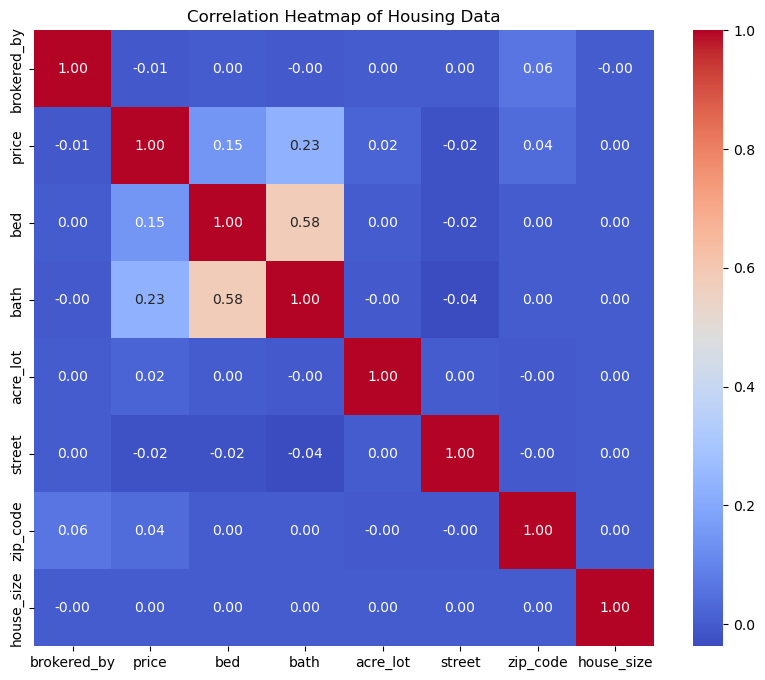

In [12]:
corr_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Housing Data')

plt.show()

<div style="border-radius: 28px; border: purple solid; padding: 10px; background-color: #; font-size: 100%;">


### Findings:

__Moderate Relationships:__

* `bed and bath`: There is a moderate relationship (0.58) between the number of bedrooms and bathrooms. This means that when houses have more bedrooms, they usually also have more bathrooms. This is a logical relationship in housing data.


__Weak Relationships:__

* `price` with other features: The relationship between the house price and other features is weak. The highest relationship is with the number of bathrooms (0.17), showing a small connection between the number of bathrooms and the house price.


__Features that May Not Be Useful:__

* `brokered_by`, `acre_lot`, `street`, `house_size`, and `zip_code`: These columns don’t seem to provide much useful information because their relationships with other features are weak or close to zero.

##  Bubble Plot

To explore relationships between 2 features (the number of __bedrooms and bathrooms__) and examine how other features (__price, house size, and lot size__) represented by the size of the bubbles.

The dataset has over 2 million rows, using __Random Sampling__ to reduce its size for better performance.

In [13]:
# Take a random sample of 5000 rows from the dataset
sampled_data = housing.sample(n=500, random_state=42)

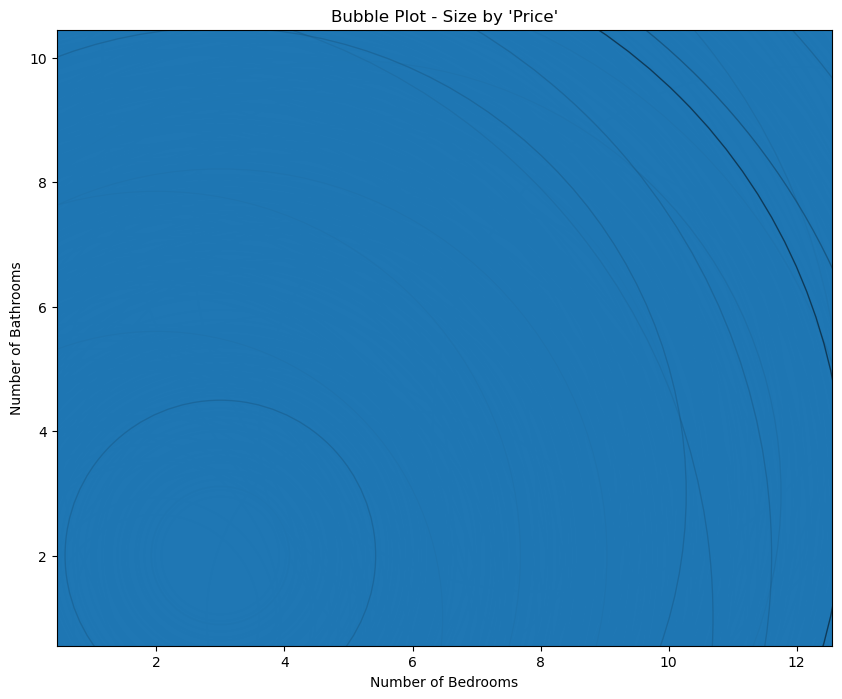

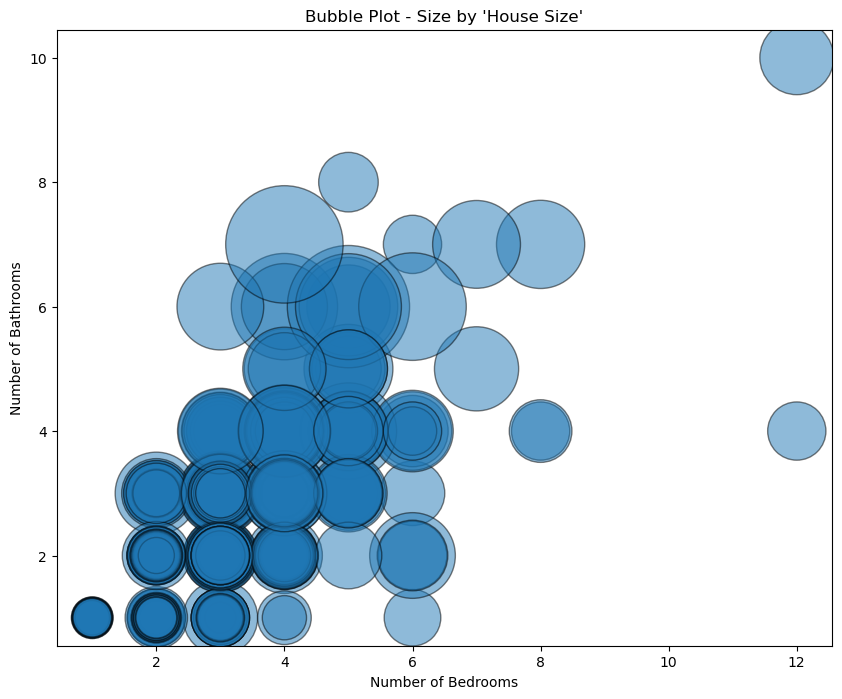

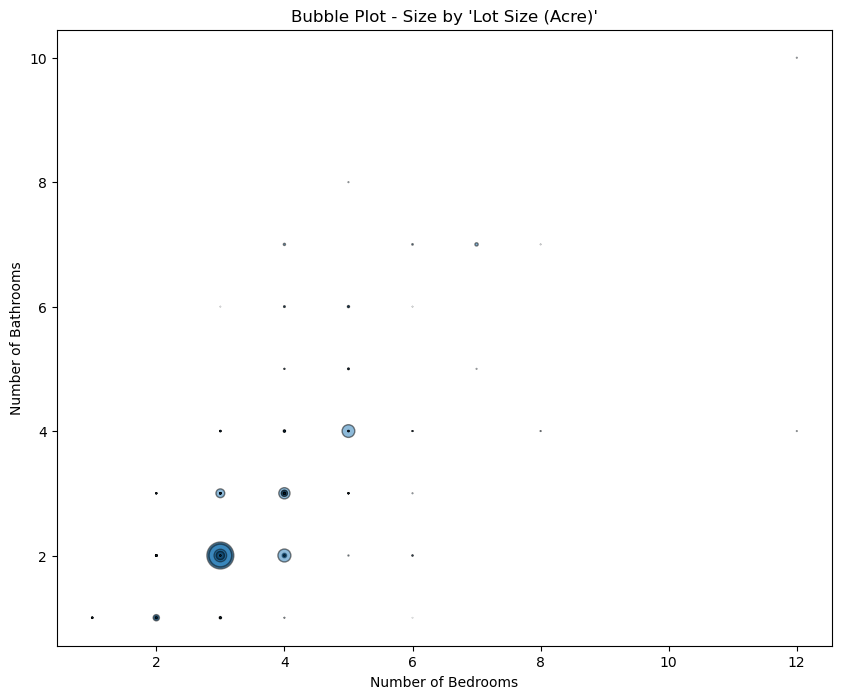

In [14]:

def bubble_plot(size_col, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(sampled_data["bed"], sampled_data["bath"], s=sampled_data[size_col], alpha=0.5, edgecolors="k")
    plt.xlabel("Number of Bedrooms")
    plt.ylabel("Number of Bathrooms")
    plt.title(title)
    plt.show()

# size is determined by 'price'
bubble_plot("price", "Bubble Plot - Size by 'Price'")

# size is determined by 'house_size'
bubble_plot("house_size", "Bubble Plot - Size by 'House Size'")

# size is determined by 'acre_lot'
bubble_plot("acre_lot", "Bubble Plot - Size by 'Lot Size (Acre)'")


<div style="border-radius: 28px; border: purple solid; padding: 10px; background-color: #; font-size: 100%;">

### Findings:

__Bubble Plot - Size by 'Price':__
* The plot still has overly large bubbles, making it difficult to interpret any meaningful trends.
* The extreme bubble sizes suggest that housing prices are too high or need further scaling.

__Bubble Plot - Size by 'House Size':__
* A clear pattern is emerging: as the number of bedrooms increases, the house size also tends to increase.
* 2 outliers found.

__Bubble Plot - Size by 'Lot Size (Acre)':__

* This visualization shows small, distinct bubbles.
* The spread suggests that lot sizes do not have a strong correlation with the number of bedrooms and bathrooms.

#### Improving the code with better scaling for price and house size using 'log transformation' to reduce extreme variations

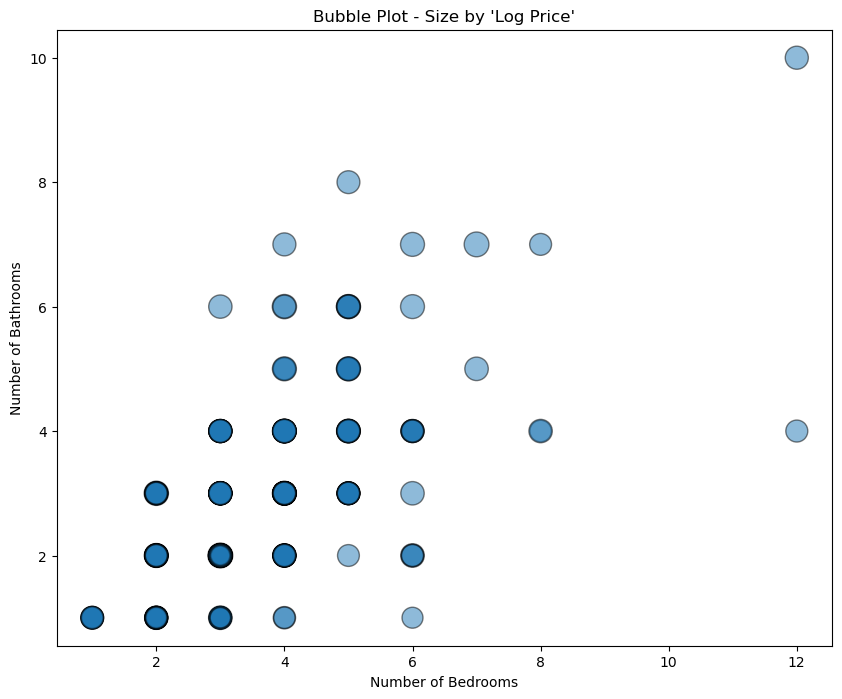

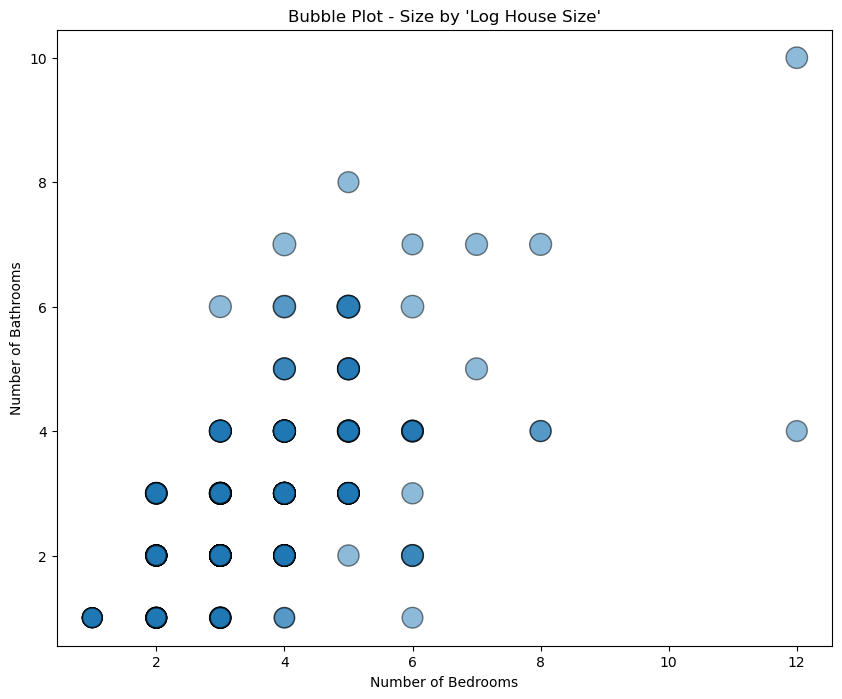

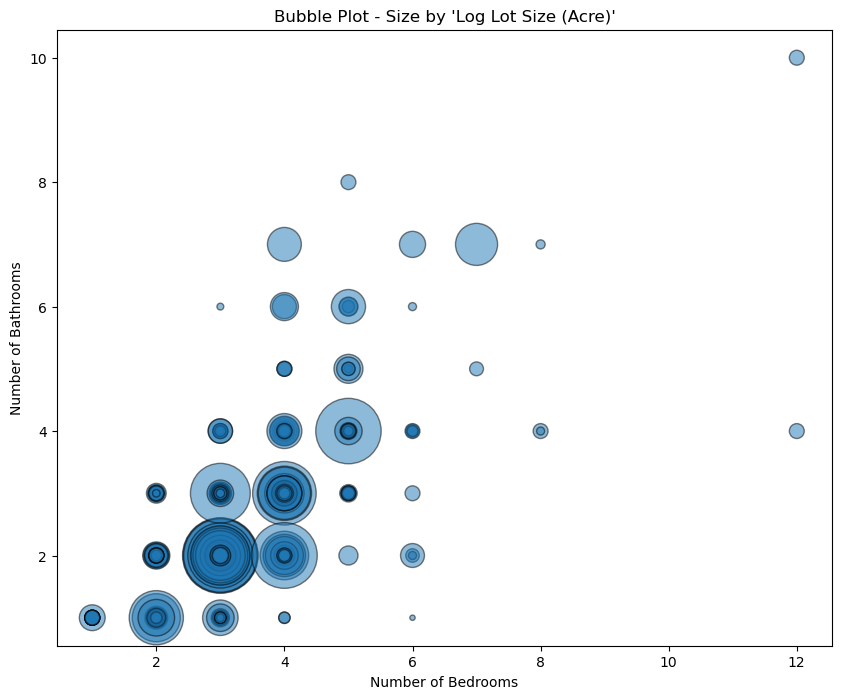

In [15]:
# Apply log transformation to normalize extreme values
sampled_data["log_price"] = np.log1p(sampled_data["price"])
sampled_data["log_house_size"] = np.log1p(sampled_data["house_size"])
sampled_data["log_acre_lot"] = np.log1p(sampled_data["acre_lot"])

def bubble_plot(size_col, title, scale_factor=50):
    plt.figure(figsize=(10, 8))
    plt.scatter(sampled_data["bed"], sampled_data["bath"], 
                s=sampled_data[size_col] * scale_factor, alpha=0.5, edgecolors="k")
    plt.xlabel("Number of Bedrooms")
    plt.ylabel("Number of Bathrooms")
    plt.title(title)
    plt.show()

# Bubble plot - Price (log-transformed)
bubble_plot("log_price", "Bubble Plot - Size by 'Log Price'", scale_factor=20)

# Bubble plot - House Size (log-transformed)
bubble_plot("log_house_size", "Bubble Plot - Size by 'Log House Size'", scale_factor=30)

# Bubble plot - Lot Size (log-transformed)
bubble_plot("log_acre_lot", "Bubble Plot - Size by 'Log Lot Size (Acre)'", scale_factor=500)

<div style="border-radius: 28px; border: purple solid; padding: 10px; background-color: #; font-size: 100%;">
    
### Findings:

* The log transformation effectively normalized extreme variations, making the trends more visible.
* Higher prices correlate with both house size and bedroom count, but some exceptions suggest external influencing factors.
* Lot sizes show a different pattern, with smaller homes often having larger lots, possibly meaning rural estates or luxury properties with more land.

## Principal component analysis

Based on the review of correlation matrix, the correlation between features are weak. For the PCA, I'll focus on **['house_size', 'price', 'bed', 'bath']** that have higher correlation values with each other. 

In [16]:
# Selecting relevant columns for PCA
features = ['house_size', 'price', 'bed', 'bath']
housing_subset = housing[features].dropna()

# Standardizing the data
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_subset)


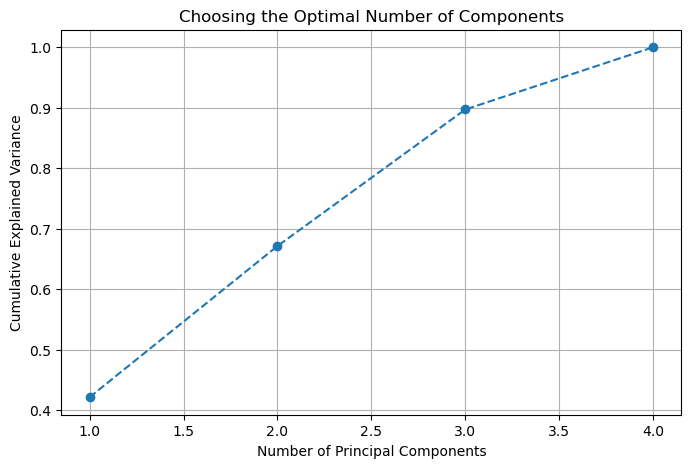

In [17]:
# Perform PCA without specifying n_components to analyze variance
pca = PCA()
pca.fit(housing_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(features) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Optimal Number of Components')
plt.grid()
plt.show()


#### Projection onto the First Principal Component

In [18]:
# Use only the first principal component
pca_1 = PCA(n_components=1)
housing_pca_1 = pca_1.fit_transform(housing_scaled)

# How much variance does the first principal component capture?
variance_captured = pca_1.explained_variance_ratio_[0]
print(f"Variance captured by the first principal component: {variance_captured:.3f}")

Variance captured by the first principal component: 0.421


<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%;">

* The first principal component captures __42.1%__ of the total variance in the housing dataset. This means that __PC1__ is quite important and explains a large part of the variation in the features we selected.

In [19]:
pca = PCA(n_components = 3) 
housing_pca = pca.fit_transform(housing_scaled)

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratios: {explained_variance.round(3)}")

print("\nPrincipal Component Vectors:")
print(pca.components_.round(3))

Explained Variance Ratios: [0.421 0.25  0.226]

Principal Component Vectors:
[[ 0.002  0.361  0.648  0.671]
 [ 1.    -0.001 -0.001 -0.001]
 [ 0.001  0.926 -0.331 -0.179]]


<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%;">
    
### Findings:

#### Explained Variance:

* The first principal component (PC1) captures __42.1%__ of the total variance.
* The second principal component (PC2) explains __25%__, the third PC3 captures __22.6%__.

Together, these 3 components explain 89.7% of the total variance.

#### Principal Component Vectors:
Each principal component is a weighted combination of the original variables.

* __PC1:__ Strongly influenced by bedrooms (0.648) and bathrooms (0.671). Also has some correlation with price (0.361). This suggests that these 2 features contribute significantly to the first principal component.

* __PC2:__ Almost entirely driven by 'house_size' with a weight close to 1, meaning it captures house size variations independently.

* __PC3:__ Mainly influenced by 'price' (0.926), but it also has negative contributions from 'bed' and 'bath'. This indicate price behaves differently compared to these features.

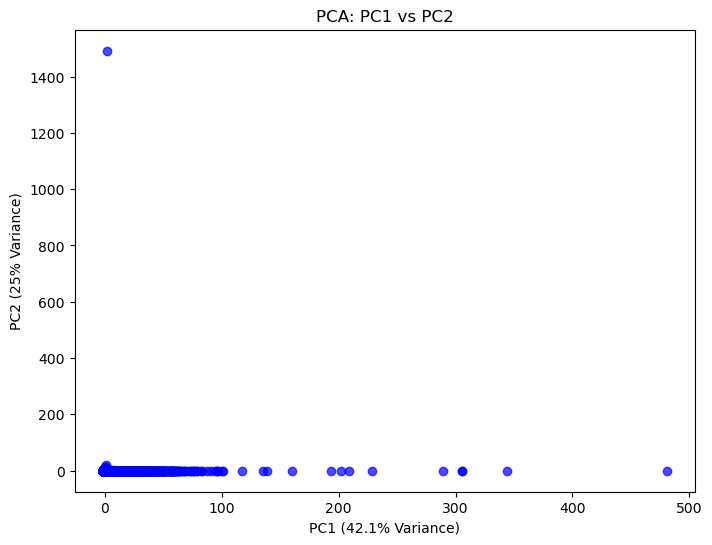

In [20]:
X_pca = housing_pca   # 100 samples, 5 principal components

# Scatter plot of PC1 vs. PC2
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='b', alpha=0.7)

# Adding titles and labels
plt.title('PCA: PC1 vs PC2')
plt.xlabel('PC1 (42.1% Variance)')
plt.ylabel('PC2 (25% Variance)')

plt.show()

<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%;">

This scatter plot shows the first two principal components (PC1 and PC2) of your housing dataset after using PCA (Principal Component Analysis). 

* __Clustering Near the Origin:__ Most of the data points are grouped close to the center (0,0), with a high concentration in the lower-left area. This indicates that many houses in the dataset have similar features.
* __Outliers or Unique Properties:__ A few points are located far from the main cluster, especially along PC1 (some reaching values as high as 500). These points likely represent outliers or unique housing units that are very different from the majority of the dataset.
.

## Linear Regression
Perform linear regression to predict one feature based on other features.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Function to Run Regression
def run_regression(X, y, target_name):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize predictors
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    corr_coeff = np.corrcoef(y_test, y_pred)[0, 1]

    # Print results in the desired format
    print(f"\n\033[1m'{target_name}' Prediction:\033[0m")
    print(f"Features: {list(X.columns)}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Correlation Coefficient: {corr_coeff:.2f}")
    print(f"R² Score: {r2:.2f}")


In [23]:
# Define feature set
features = ['house_size', 'price', 'bed', 'bath', 'acre_lot', 'zip_code']
housing_subset = housing[features].dropna()

for target in features:
    X = housing_subset.drop(columns=[target])
    y = housing_subset[target]
    run_regression(X, y, target)


'house_size' Prediction:
Features: ['price', 'bed', 'bath', 'acre_lot', 'zip_code']
Mean Squared Error: 9658839.43
Correlation Coefficient: 0.14
R² Score: -0.05

'price' Prediction:
Features: ['house_size', 'bed', 'bath', 'acre_lot', 'zip_code']
Mean Squared Error: 1485651196915.13
Correlation Coefficient: 0.26
R² Score: 0.06

'bed' Prediction:
Features: ['house_size', 'price', 'bath', 'acre_lot', 'zip_code']
Mean Squared Error: 1.73
Correlation Coefficient: 0.51
R² Score: 0.23

'bath' Prediction:
Features: ['house_size', 'price', 'bed', 'acre_lot', 'zip_code']
Mean Squared Error: 2.10
Correlation Coefficient: 0.53
R² Score: 0.28

'acre_lot' Prediction:
Features: ['house_size', 'price', 'bed', 'bath', 'zip_code']
Mean Squared Error: 639124.26
Correlation Coefficient: 0.02
R² Score: 0.00

'zip_code' Prediction:
Features: ['house_size', 'price', 'bed', 'bath', 'acre_lot']
Mean Squared Error: 836875689.09
Correlation Coefficient: 0.05
R² Score: 0.00


<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%;">

### Findings:

__House Size Prediction:__

* __Very high MSE:__ 9.66 million, __Low R² Score:__ -0.05 (poor model fit), __Correlation Coefficient:__ 0.14 (very weak correlation)
* The selected features do not effectively predict house size. The negative R² indicates the model is worse than just using the average house size as a prediction.


__Price Prediction:__

* __Extremely high MSE:__ 1.49 trillion, __Low R² Score:__ 0.06 (poor model fit), __Correlation Coefficient:__ 0.26 (weak correlation)
* The model does not capture price variations well. House prices depend on more factors not in the dataset.

__Bed Count Prediction:__

* __Moderate MSE:__ 1.73, __Low R² Score:__ 0.23 (weak model fit), __Correlation Coefficient:__ 0.51 (moderate correlation)
* The model captures some patterns in predicting the number of bedrooms but is still weak. Features like house size and price help, but more details are needed.

__Bath Prediction:__

* __Moderate MSE:__ 2.10, __Low R² Score:__ 0.28 (weak model fit), __Correlation Coefficient:__ 0.53 (moderate correlation)
* Similar to bedroom prediction, the model finds some patterns but lacks accuracy. Features may not fully represent what determines the number of bathrooms.

__Acre Lot Prediction:__

* __Very high MSE:__ 639,124, __Very Low R² Score:__ 0.00 (no model fit), __Correlation Coefficient:__ 0.02 (almost no correlation)
* The selected features do not explain acre lot size. Lot size might be more related to location and zoning rules, which are not in the dataset.

__Zip Code Prediction:__

* __Extremely high MSE:__ 836 million, __Very Low R² Score:__ 0.00 (no model fit), __Correlation Coefficient:__ 0.05 (very weak correlation)
* The model fails to predict zip codes. Zip codes are categorical and not suitable for linear regression. 


### Overall Findings:

* The models performed poorly for most predictions, especially for price, acre lot, and zip code.
* Price had a huge MSE because of large numerical values and missing important features.
* Bedrooms and bathrooms showed better correlation, but the model is still weak and needs more relevant features.
* Alternative models like decision trees or random forests might work better for non-linear relationships.

### Identifying Outliers

Using a boxplot or z-scores to identify any extreme data points.

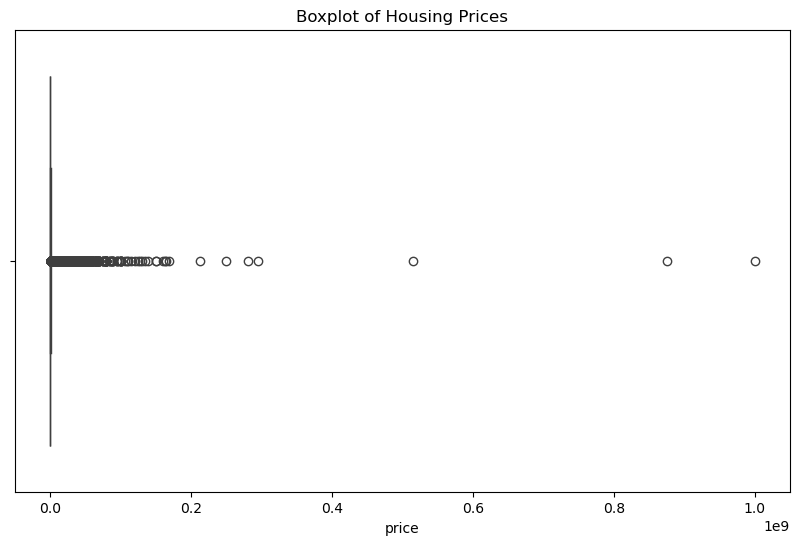

Outliers detected:
         brokered_by    status       price  bed  bath  acre_lot     street  \
56           55906.0  for_sale  10000000.0  6.0   5.0      0.12  1233063.0   
124          92147.0  for_sale   8000000.0  3.0   2.0    247.57     6475.0   
255         102909.0  for_sale  11500000.0  4.0   5.0      1.98   974575.0   
378          82827.0  for_sale  12000000.0  4.0   7.0      0.37  1189423.0   
383          33447.0  for_sale   5500000.0  3.0   2.0      0.24  1052081.0   
...              ...       ...         ...  ...   ...       ...        ...   
2213333      48710.0      sold   5600000.0  3.0   4.0      0.28  1718705.0   
2214453      78942.0      sold   6150000.0  3.0   2.0      5.60  1334464.0   
2220811      66058.0      sold   8500000.0  3.0   2.0    561.15  1935387.0   
2221413     108288.0      sold  12500000.0  5.0   3.0    957.26   967662.0   
2224114     100877.0      sold   6500000.0  5.0   6.0     61.50  1455191.0   

               city        state  zip_code  

In [24]:
# Boxplot for identifying outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing['price'])
plt.title('Boxplot of Housing Prices')
plt.show()

# Z-score method for detecting outliers (values > 3 standard deviations from mean)
from scipy.stats import zscore
housing['price_zscore'] = zscore(housing['price'].dropna())
outliers = housing[housing['price_zscore'].abs() > 3]
print("Outliers detected:")
print(outliers)


Outliers found. 

<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%;">


### Conclusions

The dataset is good for exploring patterns but needs extra data to improve predictions. PCA showed that we can reduce variables, but we must keep enough components to maintain data quality. The relationships between variables were weak, we should add more detailed features or use a different dataset with better information. Some outliers were found and need to remove them from the dataset.

#### Heatmap
* The number of `bedrooms` (bed) and `bathrooms` (bath) in houses show a moderate correlation (0.58). This suggests that larger homes with more bedrooms tend to have more bathrooms, which is a logical relationship in housing data.
* The house `price` (price) has a weak correlation with other features, the highest being with the number of bathrooms (0.17). This suggests that while there is a connection, it's not a strong one.
* Columns like `brokered_by`, `acre_lot`, `street`, `house_size`, and `zip_code` do not show strong relationships with the target variables and may not add much value to predictive models.

#### Principal Component Analysis (PCA):

* PCA helped check if we could reduce the number of variables. The first component explained a large part of the data, but using only one or two components caused information loss. This means reducing variables is possible, but we still need multiple features to keep useful data.

#### Linear Regression Analysis:
* The models performed poorly for most predictions, especially for price, acre lot, and zip code.
* Price had a huge MSE because of large numerical values and missing important features.
*  Bedrooms and bathrooms showed better correlation, but the model is still weak and needs more relevant features.
* Alternative models like decision trees or random forests might work better for non-linear relationship.
  
#### Outliers & Data Quality:
* Some extreme price values (outliers) were found, which could affect analysis results.
* More work is needed to handle these outliers by removing or adjusting them.s.


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

***
### Reproducing the Figure 5.13 from Storytelling with Data (p. 148)

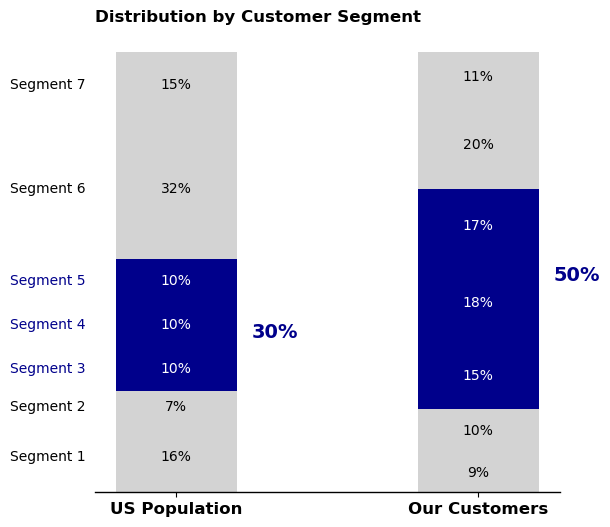

In [25]:
# Data
segments = ["Segment 1", "Segment 2", "Segment 3", "Segment 4", "Segment 5", "Segment 6", "Segment 7"]
us_population = [16, 7, 10, 10, 10, 32, 15] 
our_customers = [9, 10, 15, 18, 17, 20, 11]  

# Positions for the bars
bar_width = 0.4

fig, ax = plt.subplots(figsize=(6, 6))

# Plot stacked bars for US Population
ax.bar(0, us_population[0], color='lightgray', width=bar_width)
for i in range(1, len(us_population)):
    color = 'darkblue' if 2 <= i <= 4 else 'lightgray'  # Highlight Segments 3-5
    ax.bar(0, us_population[i], bottom=sum(us_population[:i]), color=color, width=bar_width)

# Plot stacked bars for Our Customers
ax.bar(1, our_customers[0], color='lightgray', width=bar_width)
for i in range(1, len(our_customers)):
    color = 'darkblue' if 2 <= i <= 4 else 'lightgray'
    ax.bar(1, our_customers[i], bottom=sum(our_customers[:i]), color=color, width=bar_width)

# Labels on the left (Y-axis)
for i, segment in enumerate(segments):
    color = 'darkblue' if 2 <= i <= 4 else 'black'  # Segments 3-5 in blue
    ax.text(-0.3, sum(us_population[:i]) + us_population[i] / 2, segment, fontsize=10, color=color, va='center', ha='right')

# Add labels below bars
ax.set_xticks([0, 1])
ax.set_xticklabels(["US Population", "Our Customers"], fontsize=12, fontweight='bold')

# Annotate percentages inside bars
for i, (pop, cust) in enumerate(zip(us_population, our_customers)):
    y_offset_pop = sum(us_population[:i]) + pop / 2
    ax.text(0, y_offset_pop, f"{pop}%", ha='center', va='center', fontsize=10, color='white' if 2 <= i <= 4 else 'black')

    y_offset_cust = sum(our_customers[:i]) + cust / 2
    ax.text(1, y_offset_cust, f"{cust}%", ha='center', va='center', fontsize=10, color='white' if 2 <= i <= 4 else 'black')

# Position adjustment for 30% (US Population) and 50% (Our Customers)
ax.text(0.25, sum(us_population[2:5]) +5, "30%", fontsize=14, color='darkblue', fontweight='bold')
ax.text(1.25, sum(our_customers[2:5]) - 2, "50%", fontsize=14, color='darkblue', fontweight='bold')

# Remove y-axis
ax.set_yticks([])

# Keep only bottom border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)

# Title
ax.set_title("Distribution by Customer Segment", fontsize=12, loc = 'left', fontweight='bold')

plt.show()
